<div class="alert alert-block alert-info">
__14/15__ Ananya Sriram

See comments below.

# Donovan Feist

# CH EN 3603

# Homework 9

# Problem 1

The exit gas from an alcohol fermenter consists of an air–CO2 mixture containing 10 mol% CO2 that is to be absorbed in a 5.0-N solution of triethanolamine, containing 0.04 mol CO2 per mole of amine solution. If the column operates isothermally at 25 $^oC$, if the exit liquid contains 78.4% of the CO2 in the feed gas to the absorber, and if absorption is carried out in a six-theoretical-plate column, use the equilibrium data below to calculate:

(a) exit gas composition,

(b) moles of amine solution required per mole of feed gas.

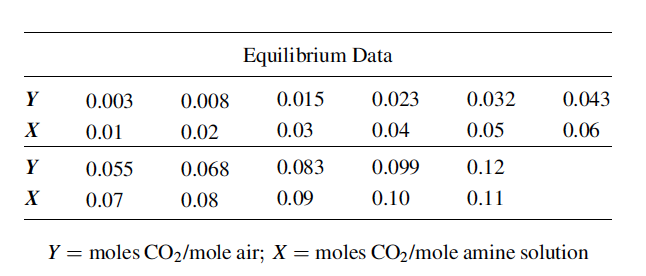

## part a solution

In [7]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


#data
y7=0.10 #mole fraction of CO2 in air-CO2 mixture that is to be absorbed
normality=5.0 #mole equivalents/L; normality of absorbing solution of triethanolamine
X0=0.04 #moles of CO2 per mole of amine solution
T=298 #K (=25 C); isothermal operating temperature of the column
α=0.784 #exit liquid contains 78.4% of the CO2 in the feed gas to the absorber
plates=6 #number of theoretical plates
Y=np.array([0.003,0.008,0.015,0.023,0.032,0.043,0.055,0.068,0.083,0.099,0.12])
X=np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11])

Doing a mole balance on the $CO_2$ in the vapor steam

$Y_1 V^{'}=(1-\alpha)Y_7 V^{'} \Rightarrow$

$Y_1=(1-\alpha)Y_7$

where $\alpha$ is the fraction of $CO_2$ that goes into the liquid phase.

The mole fraction of $CO_2$ in the vapor exit stream can then be calculated using the equation

### $y_1=\frac{Y_1}{1+Y_1}$

In [8]:
Y7=y7/(1-y7)
Y1=(1-α)*Y7
y1=Y1/(1+Y1)
print(y1)

0.023437499999999997


The mole fraction of $CO_2$ in the exit vapor stream is $\boxed{y_1=0.0234}$.

## part b solution

Since we know $Y_1$, we can use this value to interpolate for the value of $X_1$ using the data in the table above. Once the value for $X_1$ is known, the value for $Y_2$ can be calculated using the equation

$Y_2=(X_1-X_0)\cdot slope + Y_1$

where $X_0$ is given in the problem statement, and the slope is equal to $\frac{L^{'}}{V^{'}}$, but we'll just call it slope for now.

This itertive process is repeated until a value for $Y_7$ is calculated. This calculated value is compared to the known value of $Y_7$ (calculated above). If the difference is close to zero, then the correct value for the slope has been used. If the difference is not close to zero, a new value for the slope must be used. The value for the slope is changed until the difference between the known value of $Y_7$ and the calculated value of $Y_7$ is equal to zero. This procedure can be done by defining a functing that does the interpolation and iteration, then using the 'fsolve' function to change the slope until the difference is zero.

In [17]:
#definingt the function for interpolation and iteration
def func(slope):
    X1=np.interp(Y1,Y,X)
    Y2=(X1-X0)*slope+Y1
    X2=np.interp(Y2,Y,X)
    Y3=(X2-X0)*slope+Y1
    X3=np.interp(Y3,Y,X)
    Y4=(X3-X0)*slope+Y1
    X4=np.interp(Y4,Y,X)
    Y5=(X4-X0)*slope+Y1
    X5=np.interp(Y5,Y,X)
    Y6=(X5-X0)*slope+Y1
    X6=np.interp(Y6,Y,X)
    #print(X6)
    Y7calculated=(X6-X0)*slope+Y1
    r=Y7-Y7calculated
    return r

#solving for slope
sol=fsolve(func,1.8)
print(sol)
#print(Y1)

#X6=.087
#x6=.080
#slope=1.8524

#print(func(1.85235522))

[1.85235522]


<font color="red">
Missing xy graph.

The slope of the operating line is $\frac{L^{'}}{V^{'}}=1.852$.

Since $\frac{L^{'}}{V^{'}}=\frac{(1-x)L}{(1-y)V} \Rightarrow$

$\frac{L}{V}=\left (\frac{L^{'}}{V^{'}} \right ) \frac{(1-y)}{(1-x)}$

where y and x are the compositions of the inlet compositions of the gas and liquid respectively. This means y will be $y_7$ and x will be $x_0$.

We already know $y_7$ from the given data. $x_0$ is calculated with the equation

$x_0=\frac{X_0}{1+X_0}$

In [5]:
x0=X0/(1+X0)
print('x0=',x0)

x0= 0.038461538461538464


The values for $y_7$ and $x_0$ can now be plugged into the equation for $\frac{L}{V}$.

In [6]:
LoV=sol*(1-y7)/(1-x0)
print(LoV)

[1.73380449]


$\boxed{Moles \space\space of \space\space amine \space\space solution \space\space required \space\space per \space\space mole \space\space of \space\space feed \space\space gas=\frac{L}{V}=1.73}$